In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
cols = ["GAME_ID1", "LOCATION", "W","FINAL_MARGIN","SHOT_NUMBER","PERIOD","GAME_CLOCK", "SHOT_CLOCK", "DRIBBLES","TOUCH_TIME", "SHOT_DIST", "PTS_TYPE", "CLOSEST_DEFENDER_PLAYER_ID","CLOSE_DEF_DIST", "FGM", "PTS", "player_id"]
df = pd.read_csv("basketballshot.csv")
df.head()

GAME_ID1 LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  PERIOD GAME_CLOCK  \
0  21400899        A  W            24            1       1       1:09   
1  21400899        A  W            24            2       1       0:14   
2  21400899        A  W            24            3       1       0:00   
3  21400899        A  W            24            4       2      11:47   
4  21400899        A  W            24            5       2      10:34   

   SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0        10.8         2         1.9        7.7         2   
1         3.4         0         0.8       28.2         3   
2         NaN         3         2.7       10.1         2   
3        10.3         2         1.9       17.2         2   
4        10.9         2         2.7        3.7         2   

   CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  FGM  PTS  player_id  
0                      101187             1.3    1    2     203148  
1                      202711             6.1    0    0     203148  
2                      202711             0.9    0    0     203148  
3                      203900             3.4    0    0     203148  
4                      201152             1.1    0    0     203148

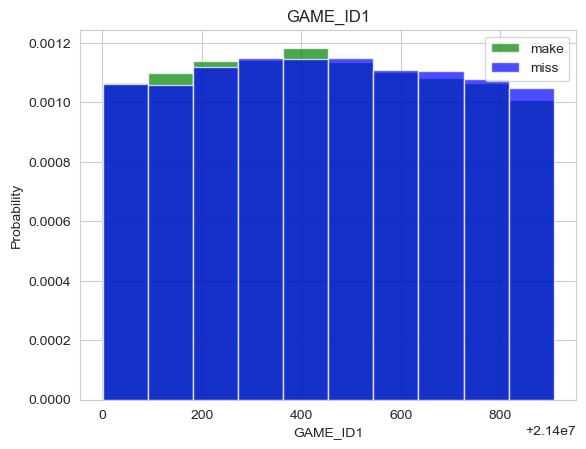

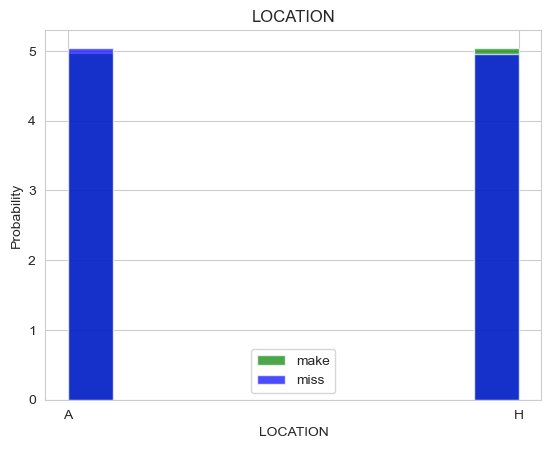

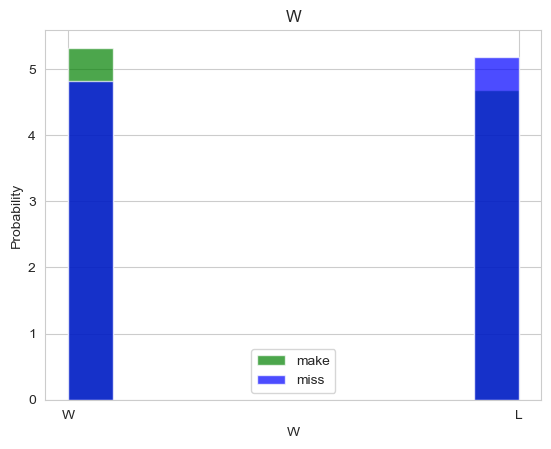

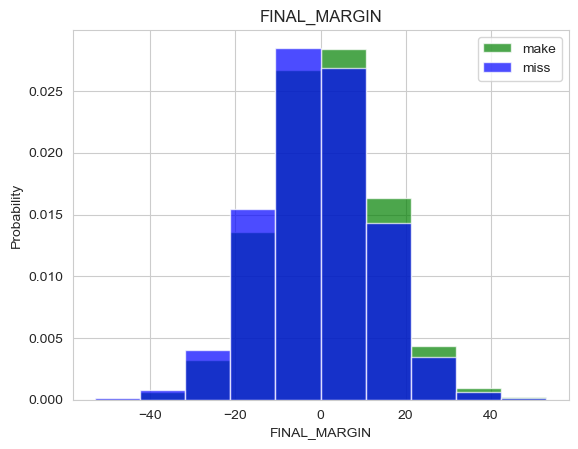

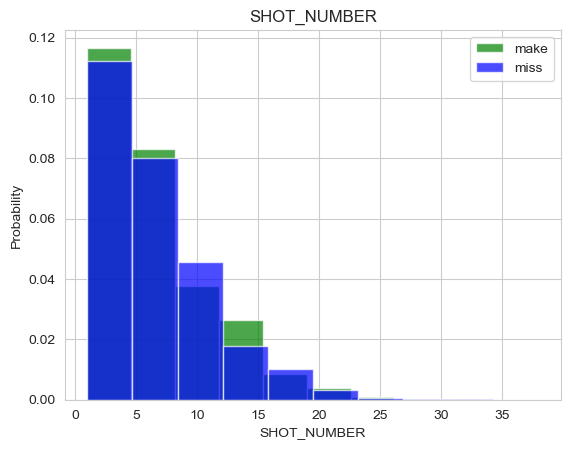

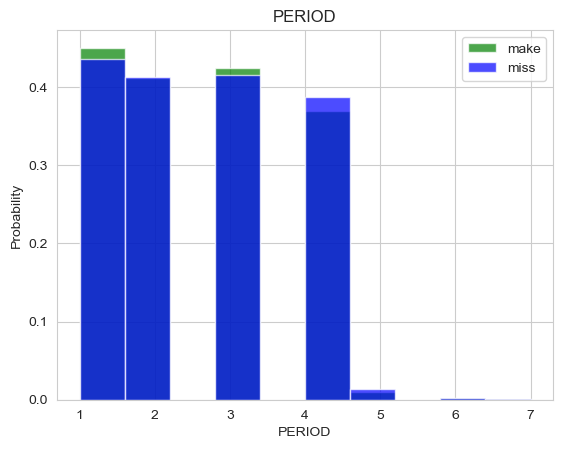

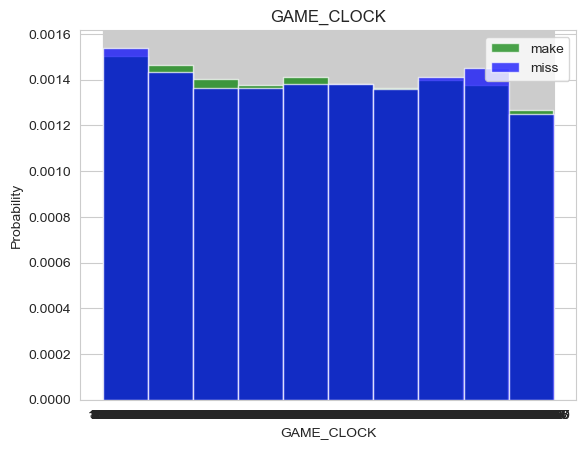

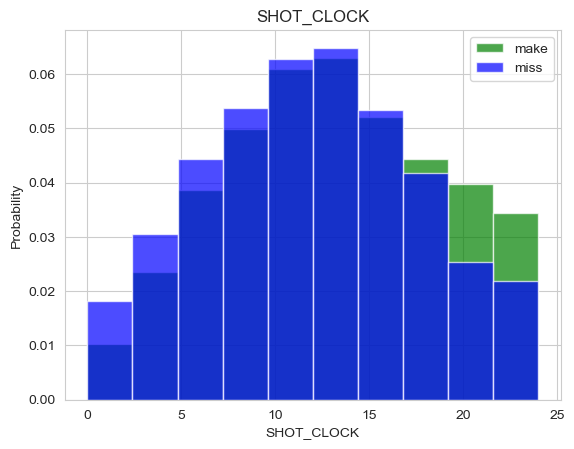

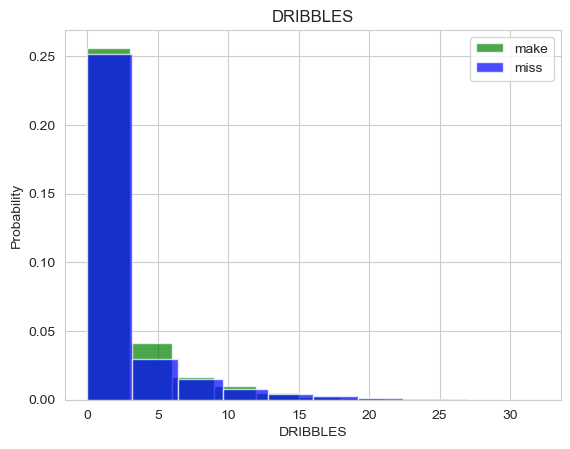

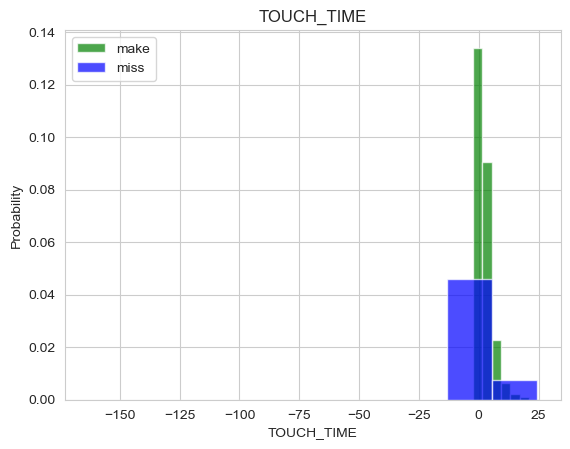

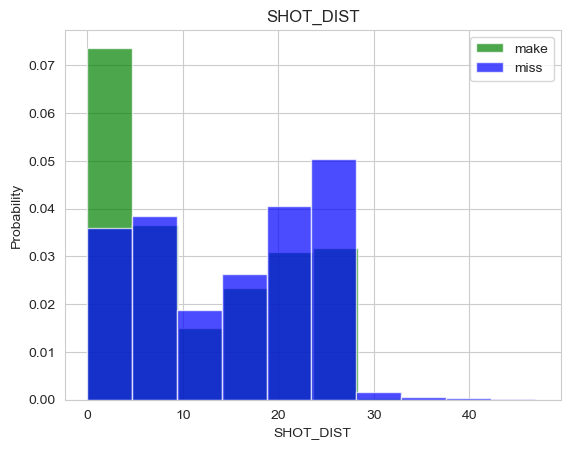

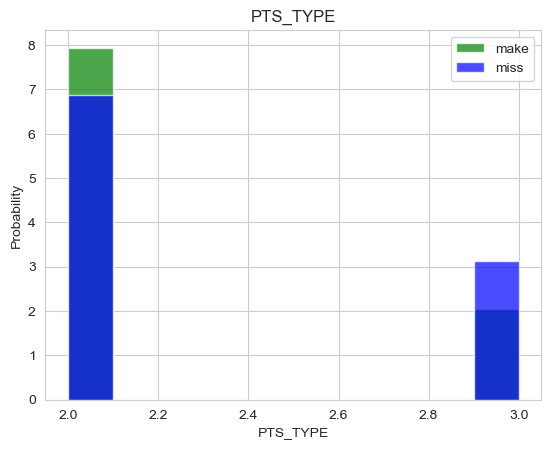

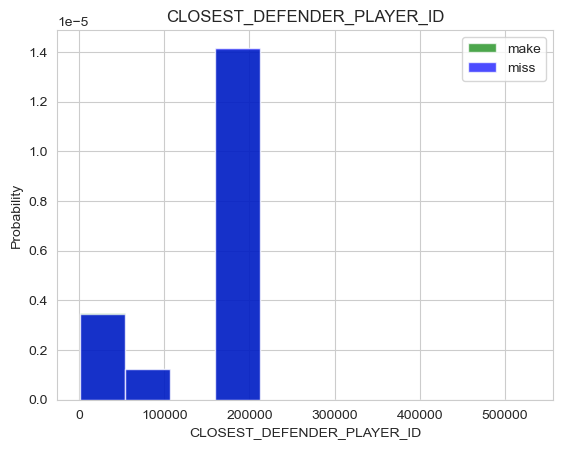

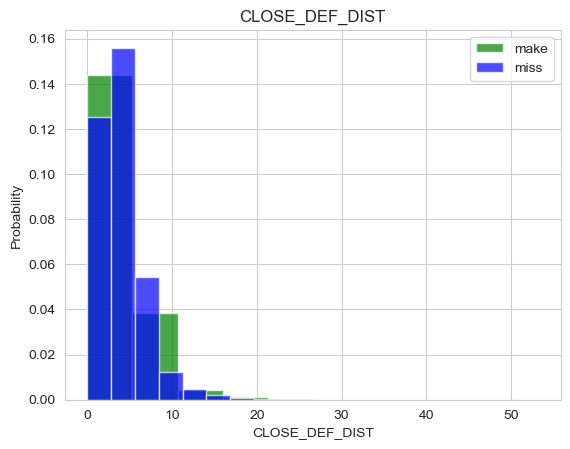

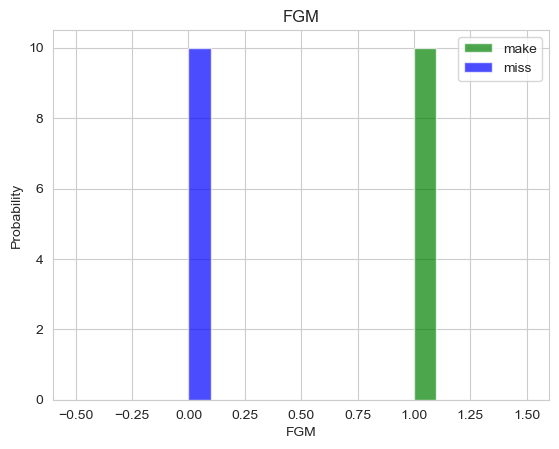

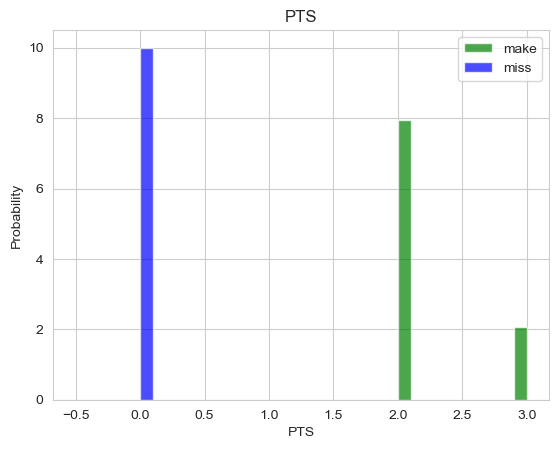

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["FGM"]==1][label], color='green', label='make', alpha=0.7, density=True)
  plt.hist(df[df["FGM"]==0][label], color='blue', label='miss', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [41]:
def scale_dataset(dataframe, oversample=False):
    
    # One-hot encoding for categorical variables  # Add any other categorical columns if needed
    
    dataframe = dataframe.dropna()

    # Extracting target and features
    y = dataframe['FGM'].values  # Use column name instead of index
    X = dataframe.drop(columns=['FGM']).values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    return dataframe, X, y

In [42]:
df.head()

GAME_ID1 LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  PERIOD GAME_CLOCK  \
0  21400899        A  W            24            1       1       1:09   
1  21400899        A  W            24            2       1       0:14   
2  21400899        A  W            24            3       1       0:00   
3  21400899        A  W            24            4       2      11:47   
4  21400899        A  W            24            5       2      10:34   

   SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0        10.8         2         1.9        7.7         2   
1         3.4         0         0.8       28.2         3   
2         NaN         3         2.7       10.1         2   
3        10.3         2         1.9       17.2         2   
4        10.9         2         2.7        3.7         2   

   CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  FGM  PTS  player_id  
0                      101187             1.3    1    2     203148  
1                      202711             6.1    0    0     203148  
2                      202711             0.9    0    0     203148  
3                      203900             3.4    0    0     203148  
4                      201152             1.1    0    0     203148

In [43]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn_model.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57     13340
           1       0.50      0.54      0.52     11127

    accuracy                           0.55     24467
   macro avg       0.55      0.55      0.55     24467
weighted avg       0.55      0.55      0.55     24467


In [48]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [49]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [50]:
y_pred = nb_model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58     13340
           1       0.53      0.64      0.58     11127

    accuracy                           0.58     24467
   macro avg       0.58      0.58      0.58     24467
weighted avg       0.59      0.58      0.58     24467


In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [53]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [54]:
y_pred = lg_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62     13340
           1       0.55      0.59      0.57     11127

    accuracy                           0.60     24467
   macro avg       0.59      0.60      0.59     24467
weighted avg       0.60      0.60      0.60     24467


In [56]:
#SVM
from sklearn.svm import SVC

In [57]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [58]:
y_pred = svm_model.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66     13340
           1       0.58      0.51      0.54     11127

    accuracy                           0.61     24467
   macro avg       0.61      0.60      0.60     24467
weighted avg       0.61      0.61      0.61     24467


In [60]:
#NN
import tensorflow as tf

In [61]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [64]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    # Define the neural network model
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(16,)),  # 16 inputs
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])

    # Compile the model
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), 
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Train the model
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history



16 nodes, dropout 0, lr 0.01, batch size 32


C:\Users\paulk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


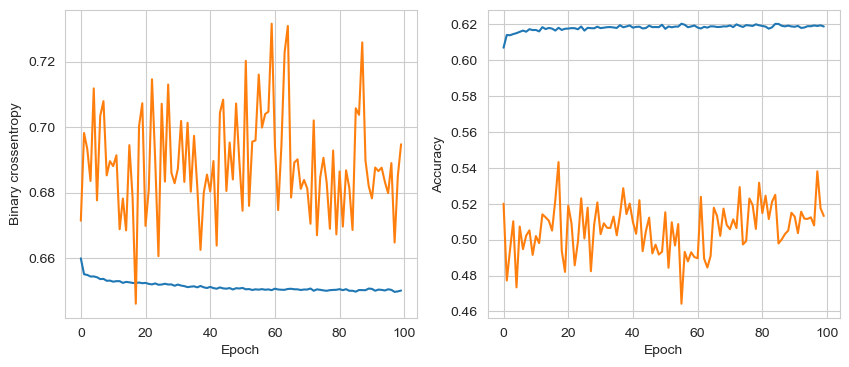

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6079 - loss: 0.6583
16 nodes, dropout 0, lr 0.01, batch size 64


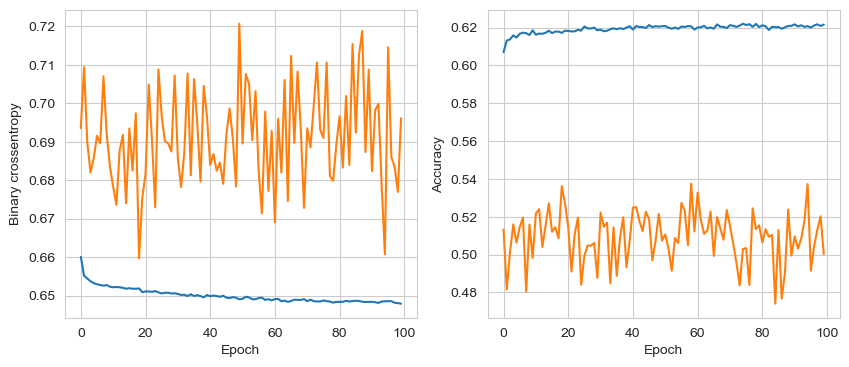

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.6098 - loss: 0.6547
16 nodes, dropout 0, lr 0.01, batch size 128


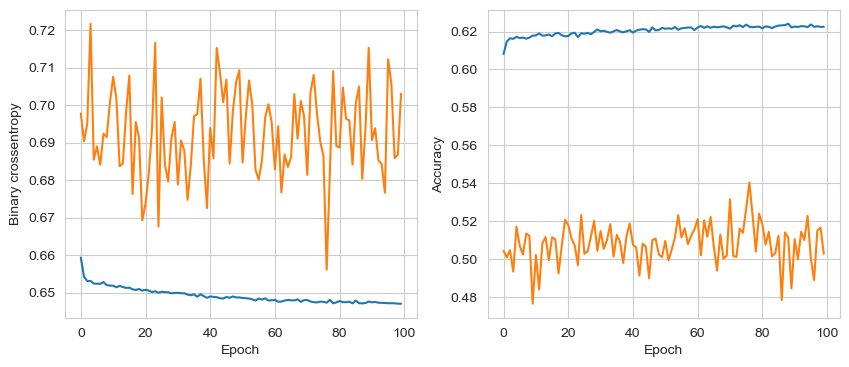

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.6085 - loss: 0.6580
16 nodes, dropout 0, lr 0.005, batch size 32


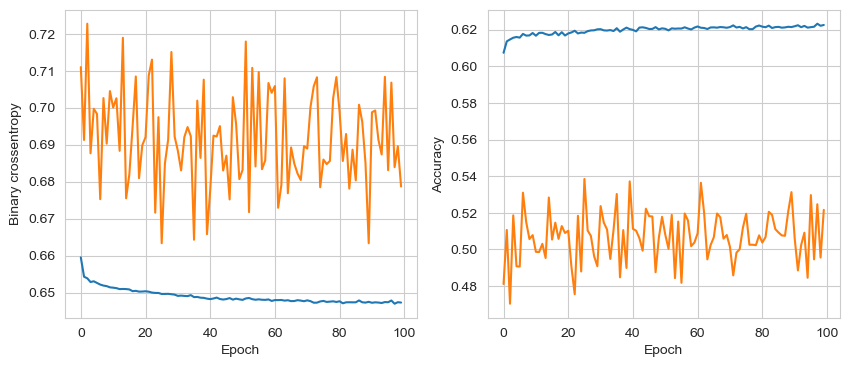

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.6091 - loss: 0.6571
16 nodes, dropout 0, lr 0.005, batch size 64


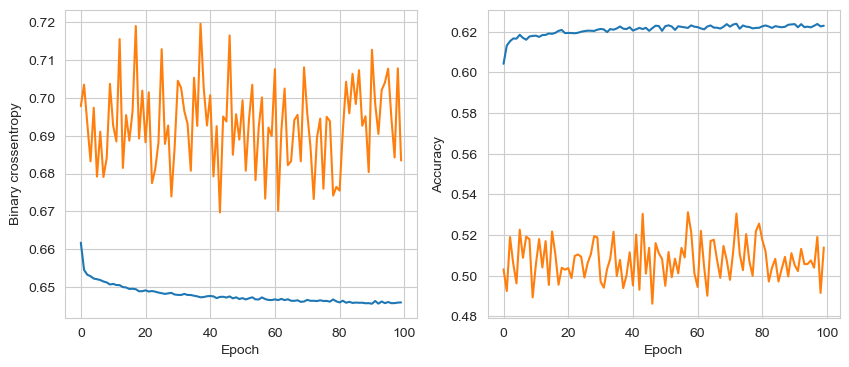

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6022 - loss: 0.6597
16 nodes, dropout 0, lr 0.005, batch size 128


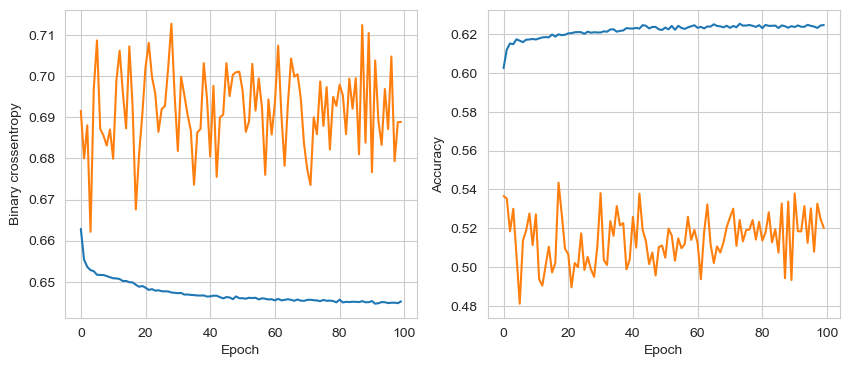

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6032 - loss: 0.6582
16 nodes, dropout 0, lr 0.001, batch size 32


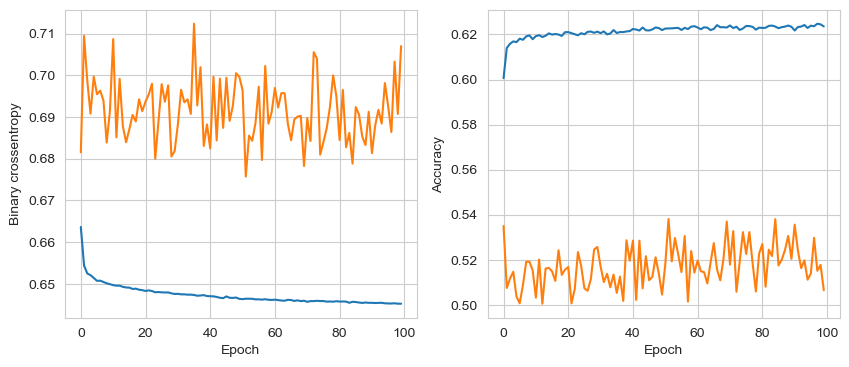

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6087 - loss: 0.6593
16 nodes, dropout 0, lr 0.001, batch size 64


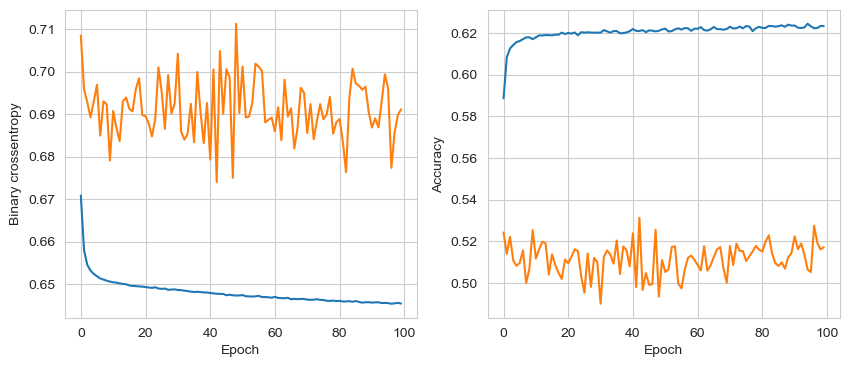

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.6037 - loss: 0.6605
16 nodes, dropout 0, lr 0.001, batch size 128


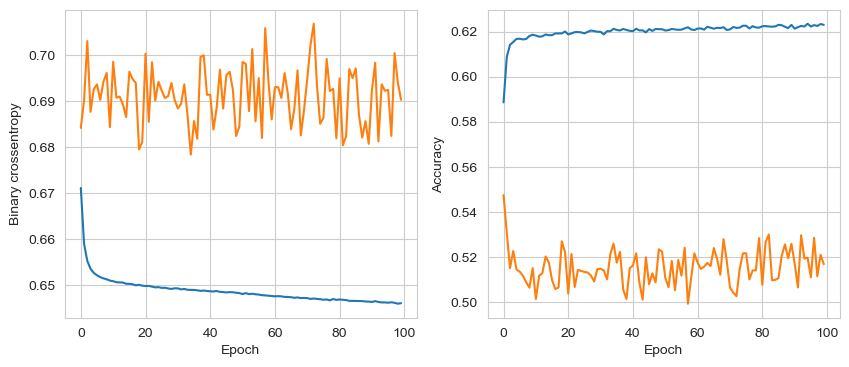

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6048 - loss: 0.6578
16 nodes, dropout 0.2, lr 0.01, batch size 32


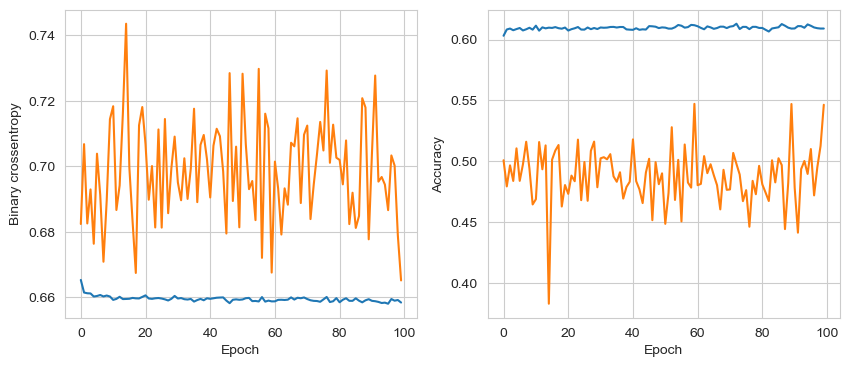

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.5967 - loss: 0.6612
16 nodes, dropout 0.2, lr 0.01, batch size 64


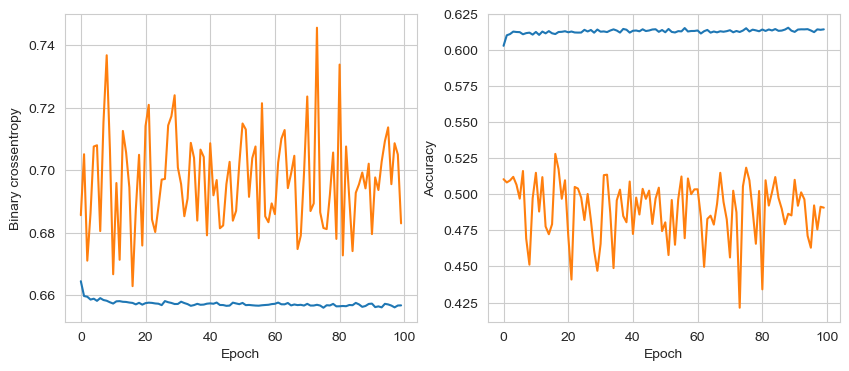

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.6074 - loss: 0.6578
16 nodes, dropout 0.2, lr 0.01, batch size 128


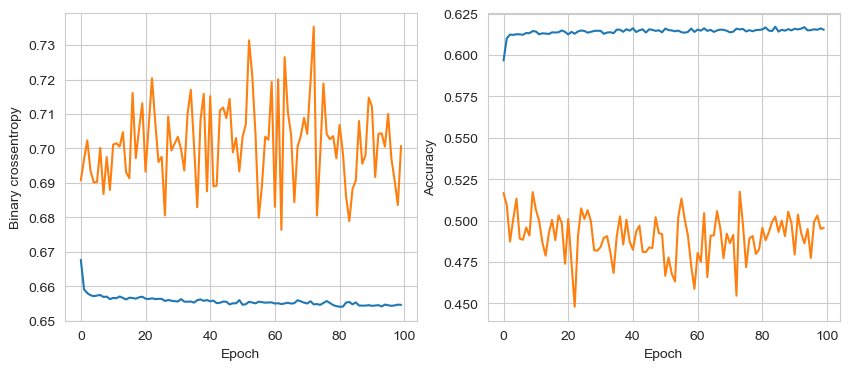

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.6070 - loss: 0.6567
16 nodes, dropout 0.2, lr 0.005, batch size 32


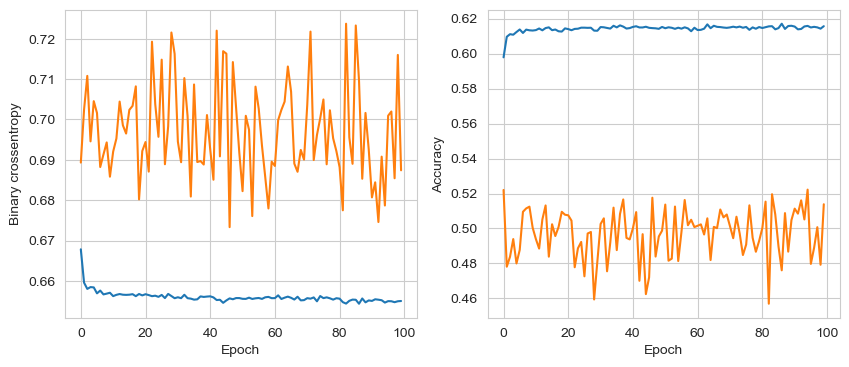

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6074 - loss: 0.6553
16 nodes, dropout 0.2, lr 0.005, batch size 64


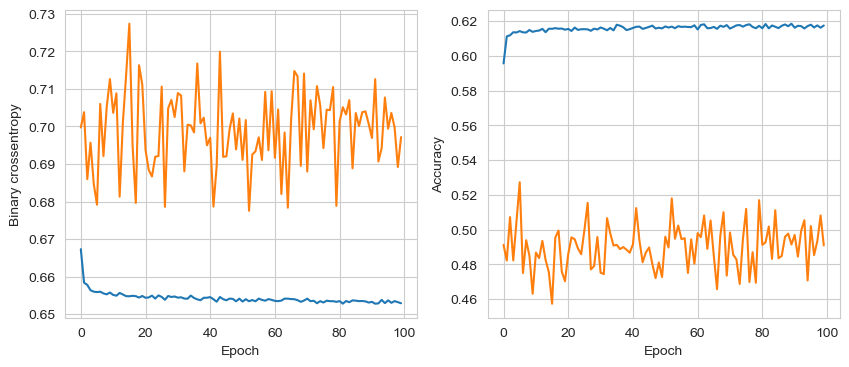

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.6086 - loss: 0.6562
16 nodes, dropout 0.2, lr 0.005, batch size 128


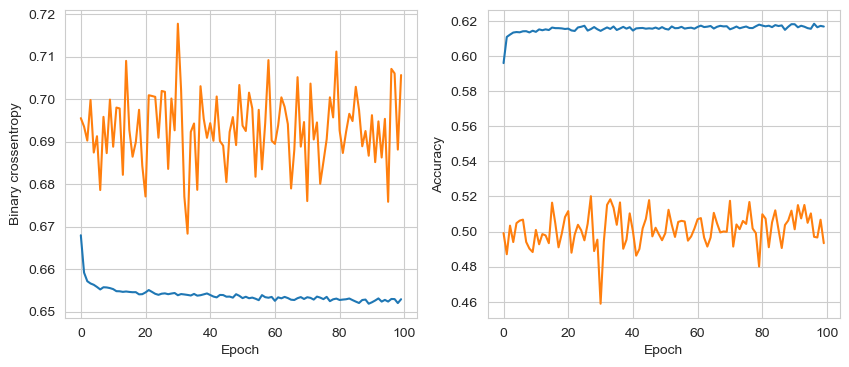

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.6090 - loss: 0.6564
16 nodes, dropout 0.2, lr 0.001, batch size 32


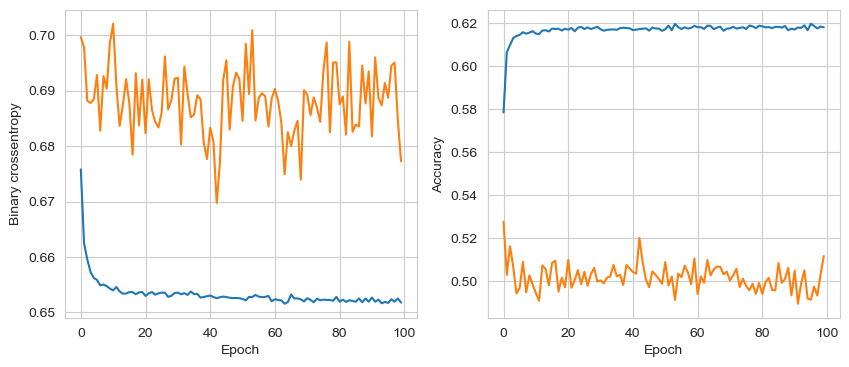

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.6052 - loss: 0.6548
16 nodes, dropout 0.2, lr 0.001, batch size 64


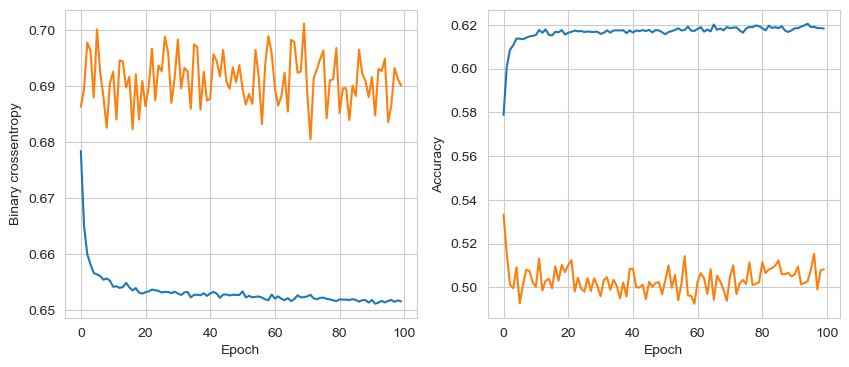

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6030 - loss: 0.6565
16 nodes, dropout 0.2, lr 0.001, batch size 128


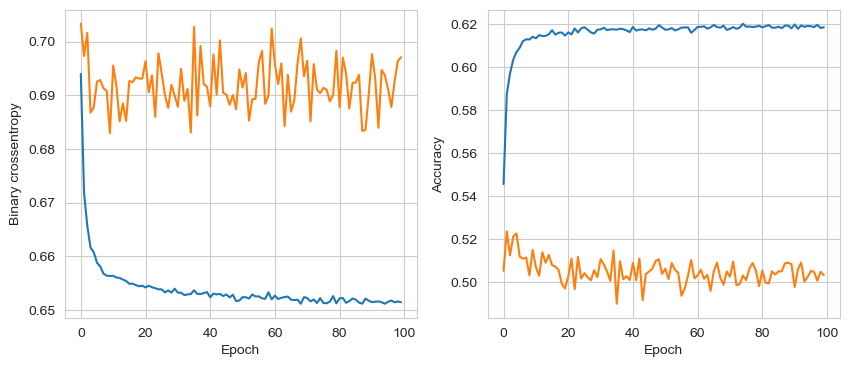

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6073 - loss: 0.6559
32 nodes, dropout 0, lr 0.01, batch size 32


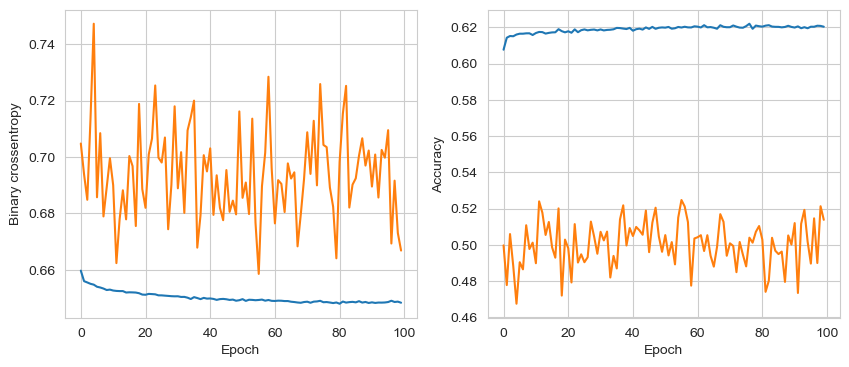

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6059 - loss: 0.6578
32 nodes, dropout 0, lr 0.01, batch size 64


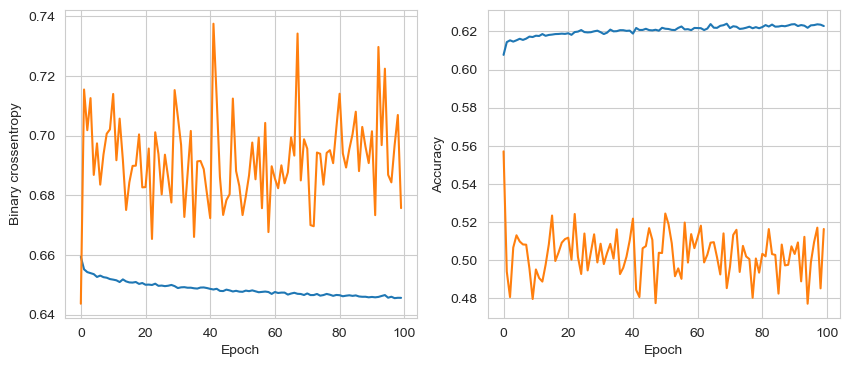

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.6060 - loss: 0.6618
32 nodes, dropout 0, lr 0.01, batch size 128


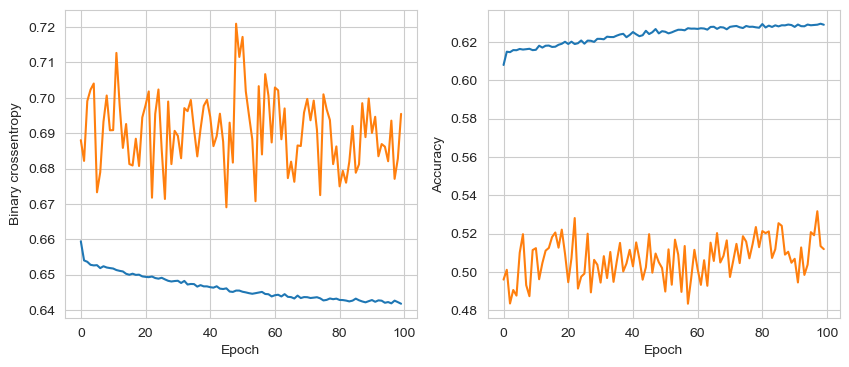

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.6036 - loss: 0.6617
32 nodes, dropout 0, lr 0.005, batch size 32


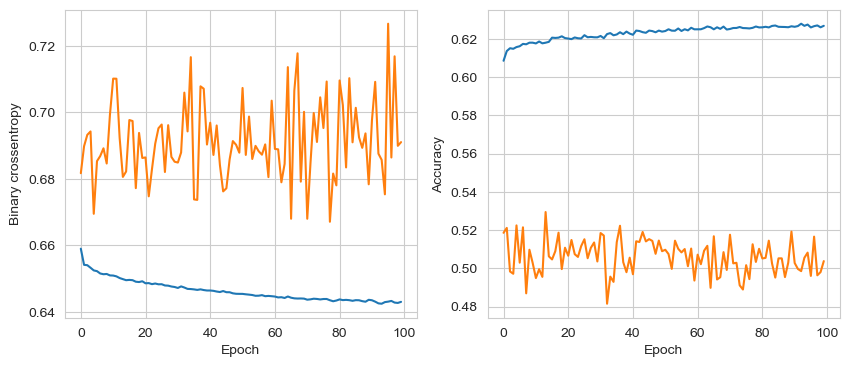

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.6047 - loss: 0.6611
32 nodes, dropout 0, lr 0.005, batch size 64


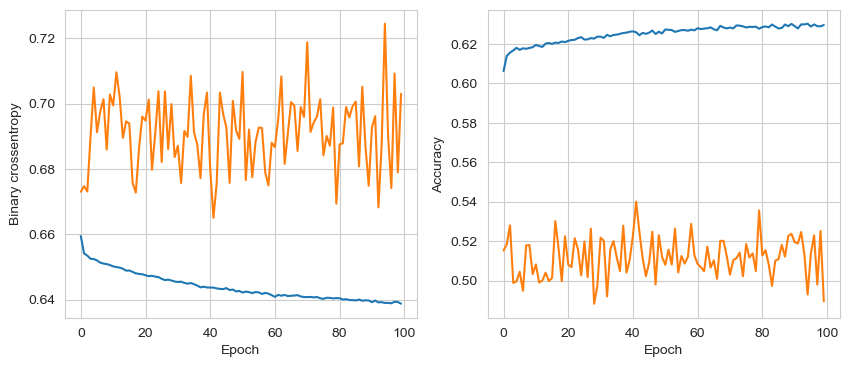

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6006 - loss: 0.6665
32 nodes, dropout 0, lr 0.005, batch size 128


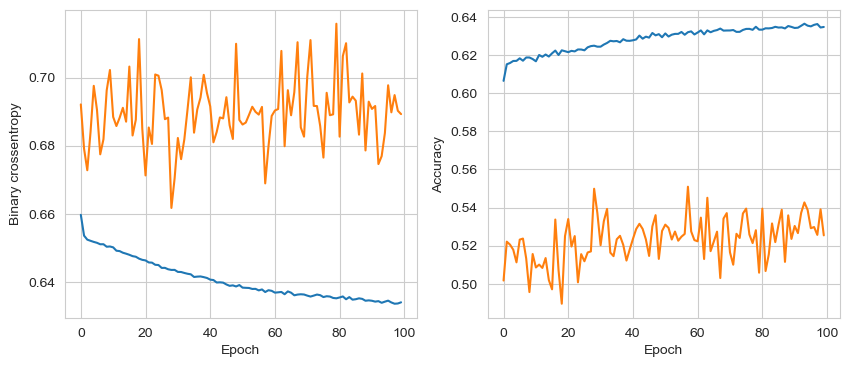

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.5976 - loss: 0.6681
32 nodes, dropout 0, lr 0.001, batch size 32


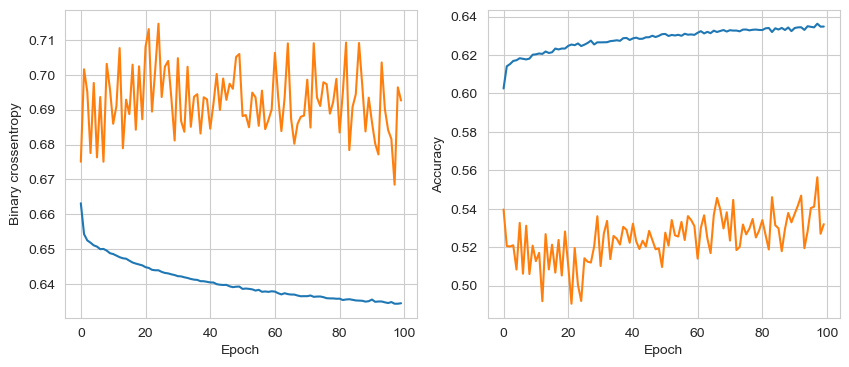

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.6009 - loss: 0.6676
32 nodes, dropout 0, lr 0.001, batch size 64


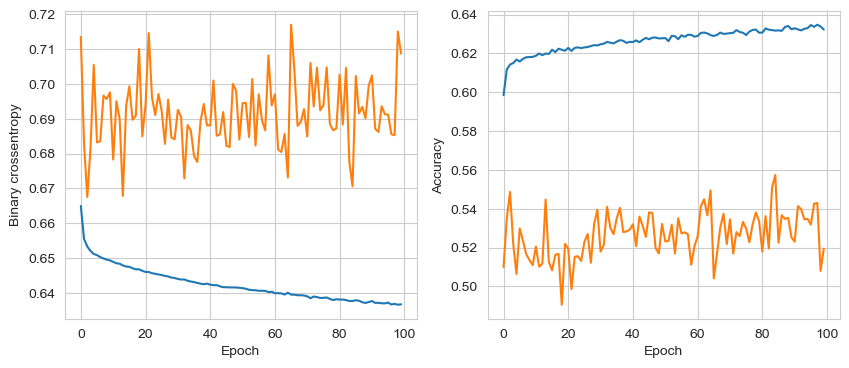

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.5964 - loss: 0.6667
32 nodes, dropout 0, lr 0.001, batch size 128


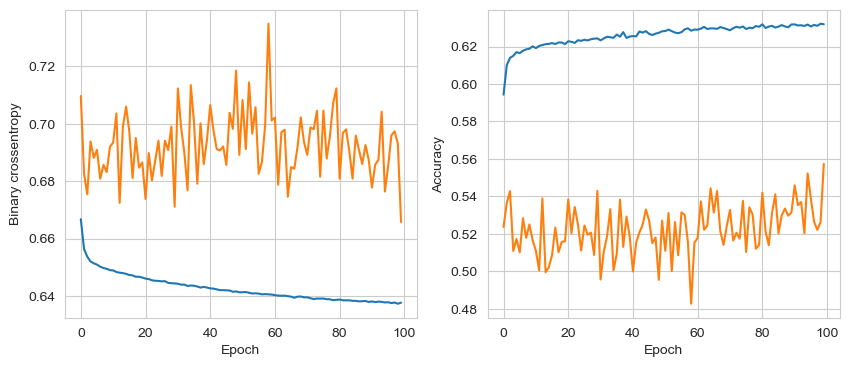

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5894 - loss: 0.6675
32 nodes, dropout 0.2, lr 0.01, batch size 32


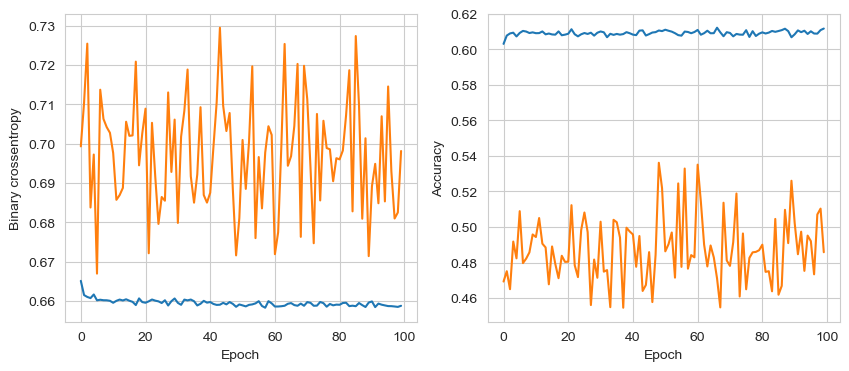

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6038 - loss: 0.6583
32 nodes, dropout 0.2, lr 0.01, batch size 64


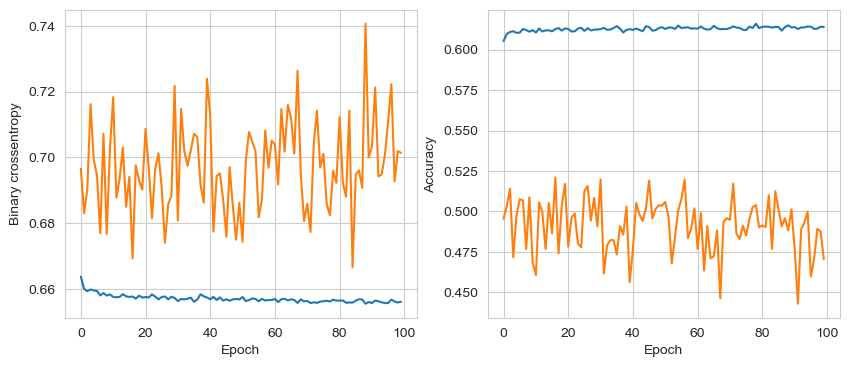

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6059 - loss: 0.6593
32 nodes, dropout 0.2, lr 0.01, batch size 128


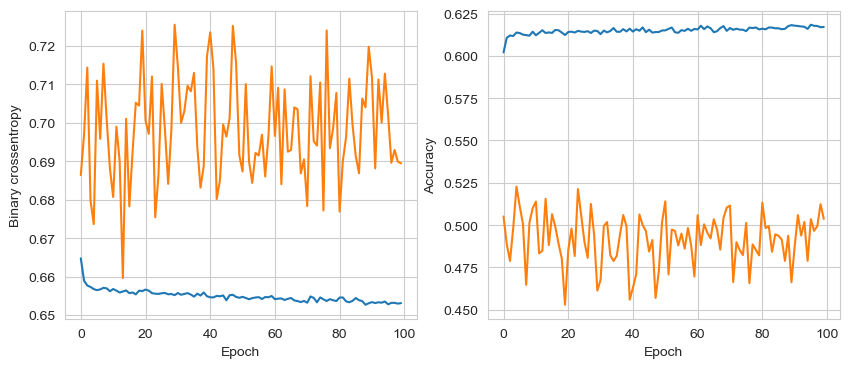

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.6059 - loss: 0.6567
32 nodes, dropout 0.2, lr 0.005, batch size 32


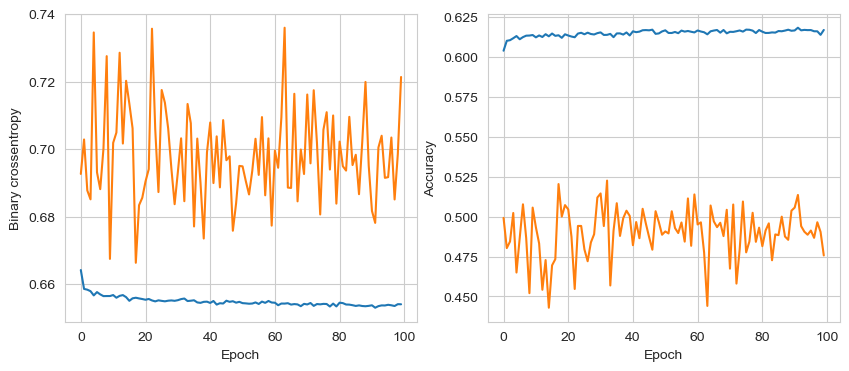

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6043 - loss: 0.6599
32 nodes, dropout 0.2, lr 0.005, batch size 64


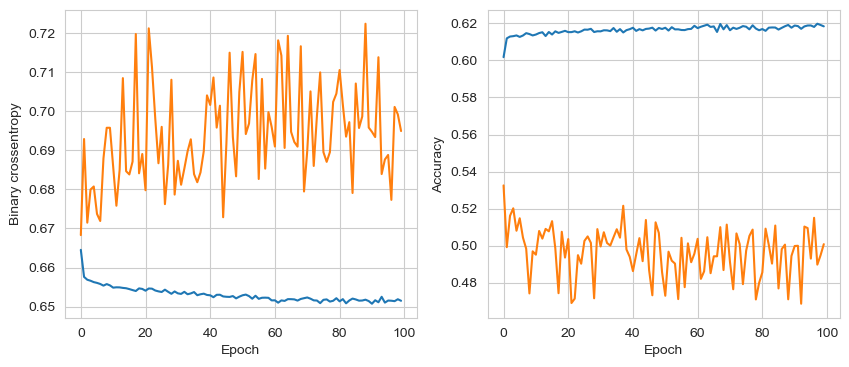

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.6078 - loss: 0.6546
32 nodes, dropout 0.2, lr 0.005, batch size 128


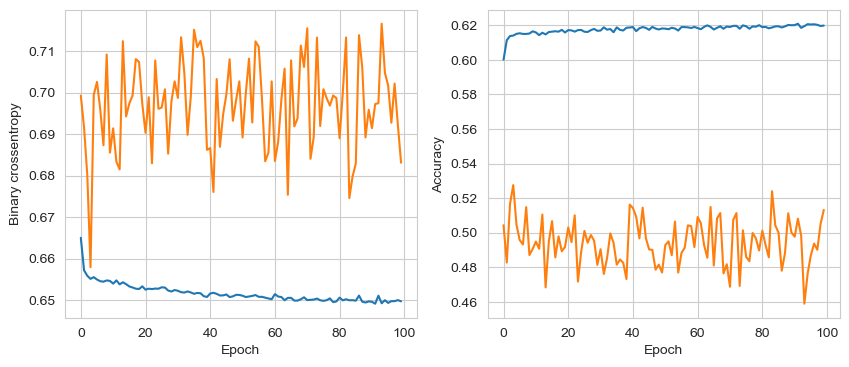

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.6062 - loss: 0.6554
32 nodes, dropout 0.2, lr 0.001, batch size 32


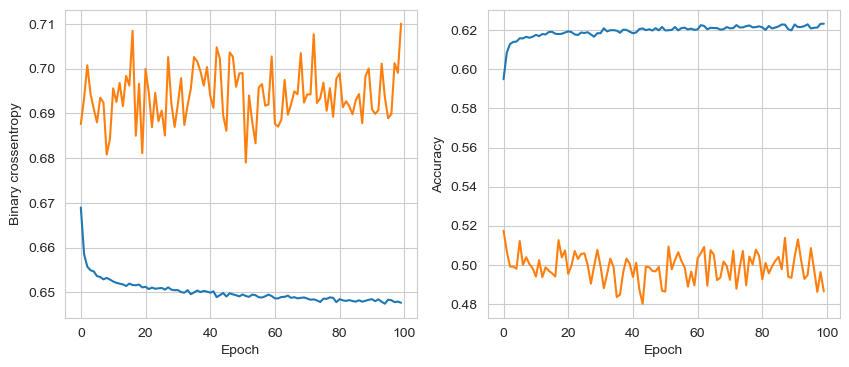

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6057 - loss: 0.6564
32 nodes, dropout 0.2, lr 0.001, batch size 64


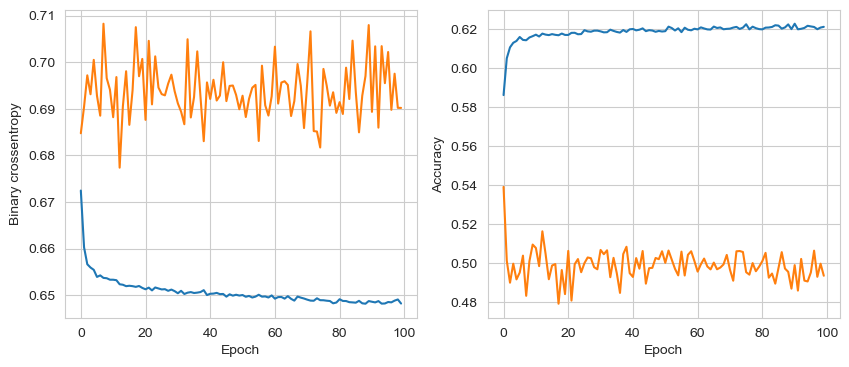

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.6050 - loss: 0.6560
32 nodes, dropout 0.2, lr 0.001, batch size 128


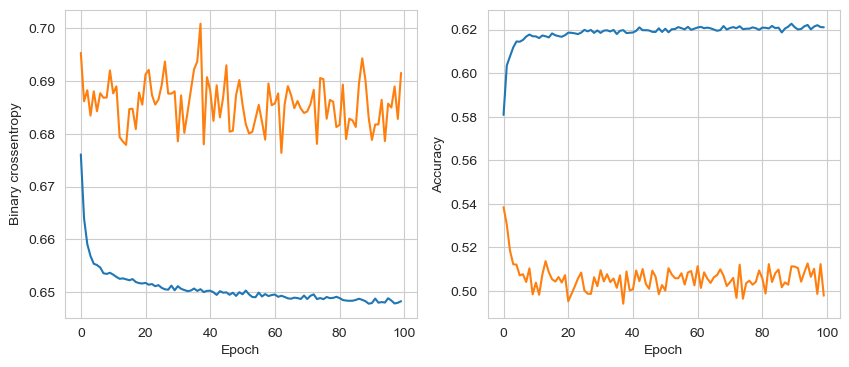

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6073 - loss: 0.6549
64 nodes, dropout 0, lr 0.01, batch size 32


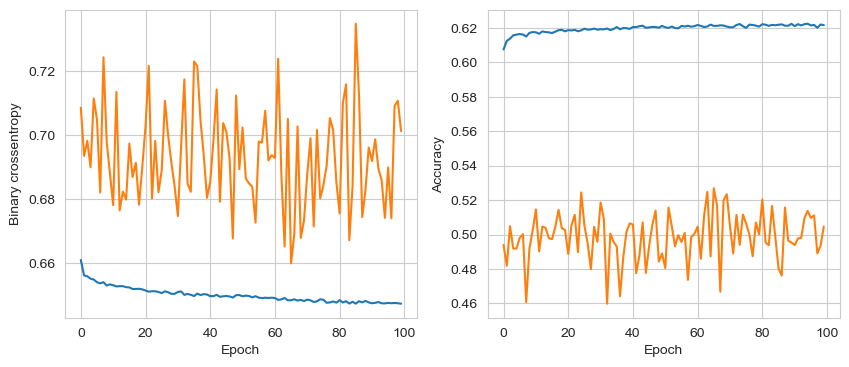

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.6090 - loss: 0.6611
64 nodes, dropout 0, lr 0.01, batch size 64


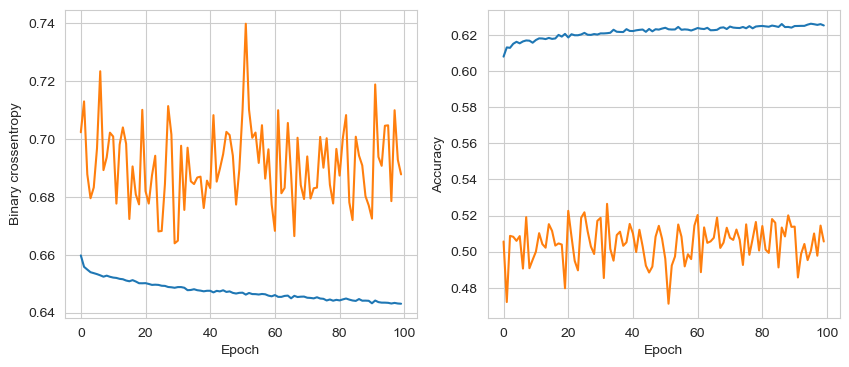

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6057 - loss: 0.6632
64 nodes, dropout 0, lr 0.01, batch size 128


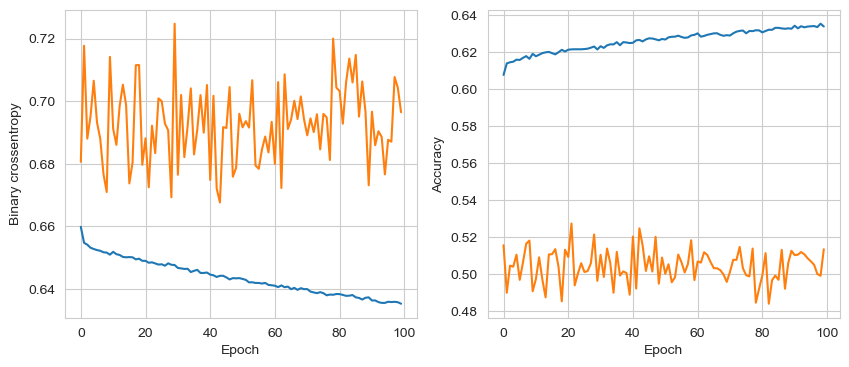

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.5986 - loss: 0.6784
64 nodes, dropout 0, lr 0.005, batch size 32


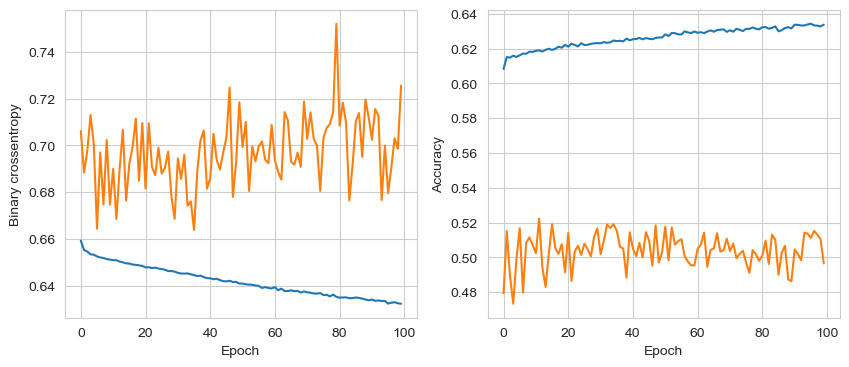

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.6026 - loss: 0.6746
64 nodes, dropout 0, lr 0.005, batch size 64


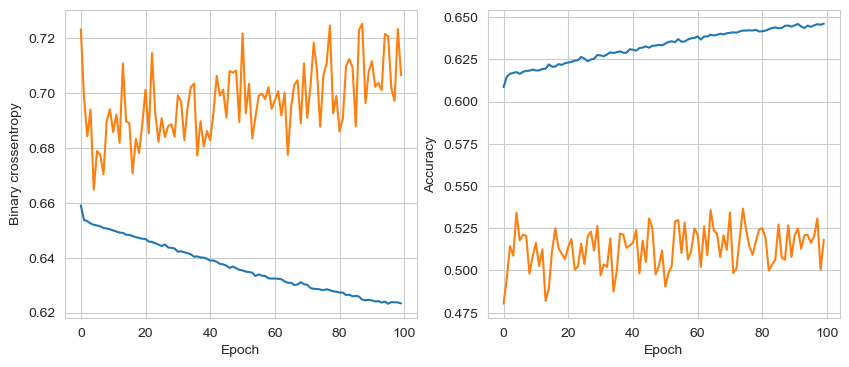

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6019 - loss: 0.6911
64 nodes, dropout 0, lr 0.005, batch size 128


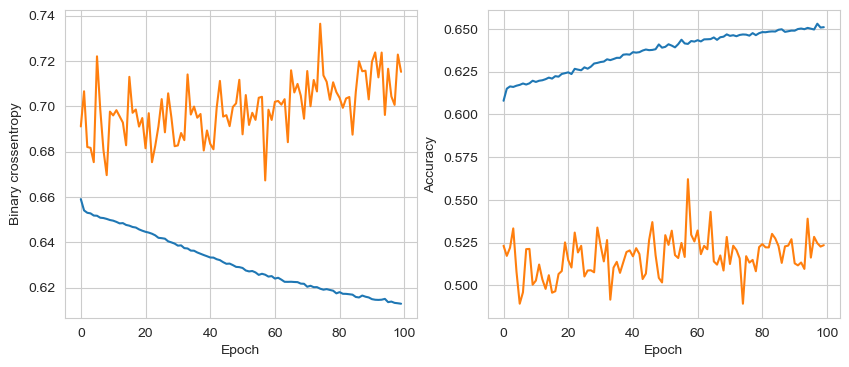

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.5919 - loss: 0.7148
64 nodes, dropout 0, lr 0.001, batch size 32


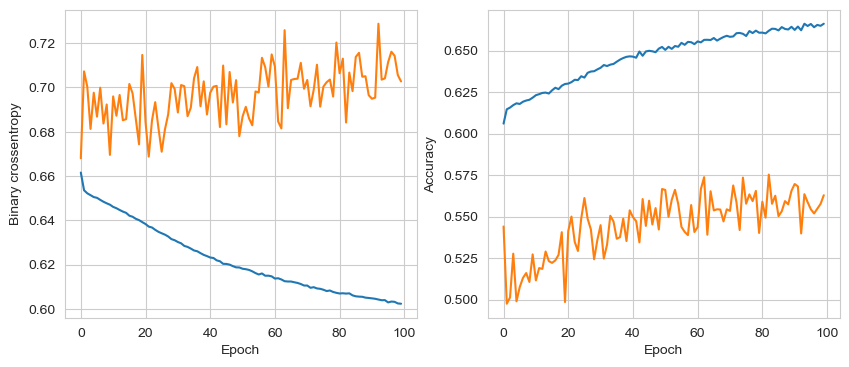

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.5788 - loss: 0.7062
64 nodes, dropout 0, lr 0.001, batch size 64


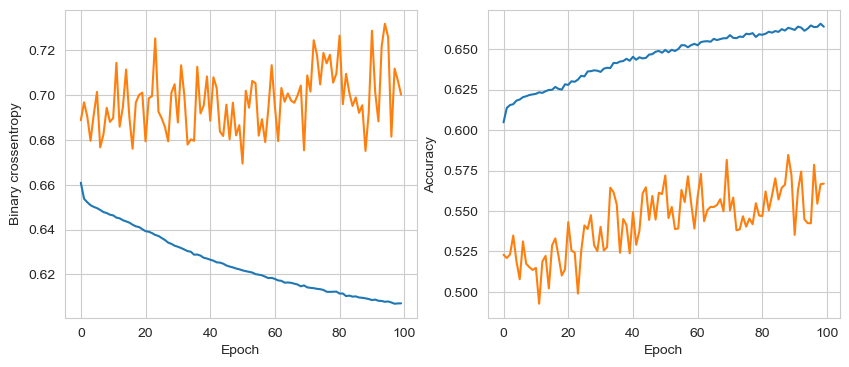

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.5867 - loss: 0.7036
64 nodes, dropout 0, lr 0.001, batch size 128


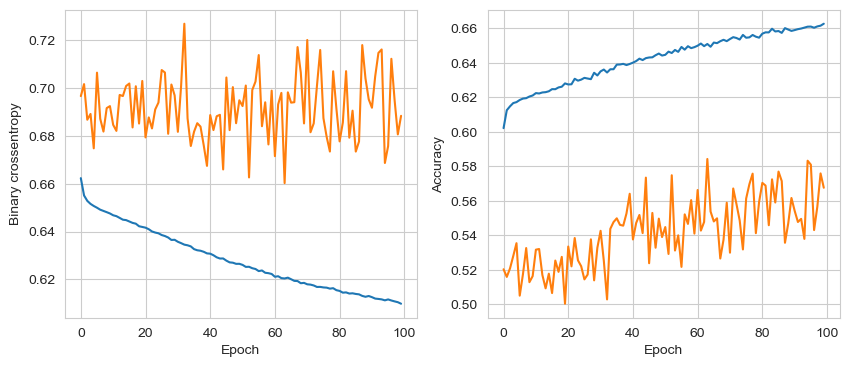

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5830 - loss: 0.6907
64 nodes, dropout 0.2, lr 0.01, batch size 32


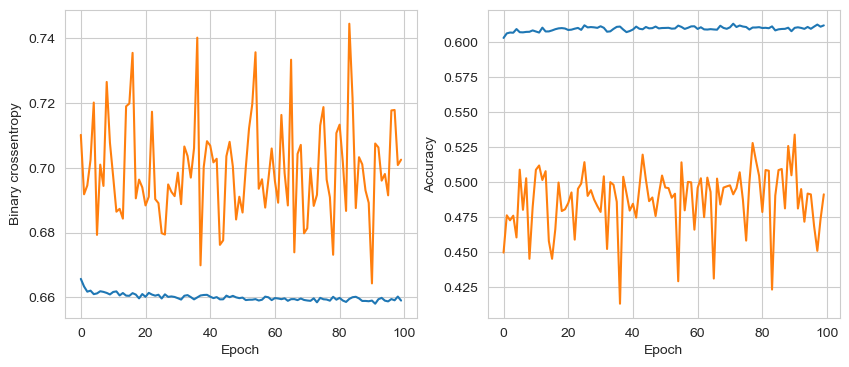

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6046 - loss: 0.6612
64 nodes, dropout 0.2, lr 0.01, batch size 64


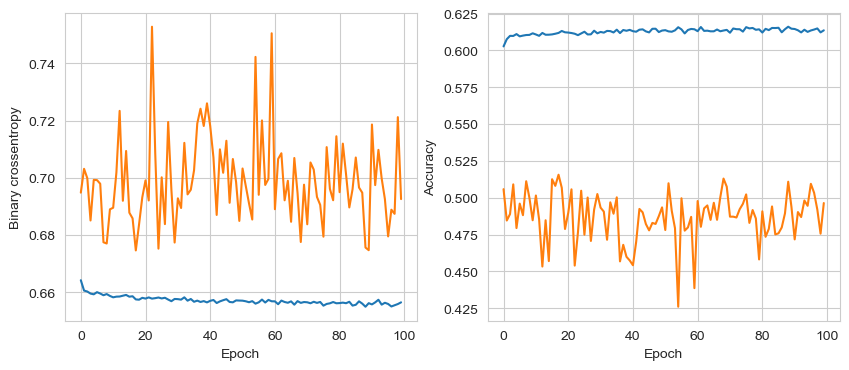

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.6043 - loss: 0.6588
64 nodes, dropout 0.2, lr 0.01, batch size 128


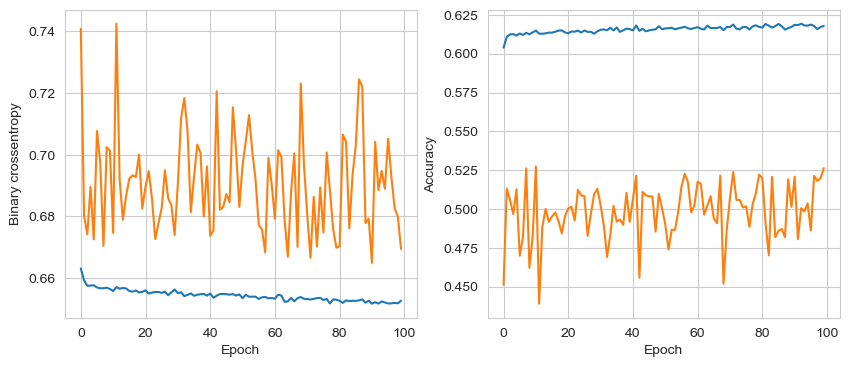

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6008 - loss: 0.6586
64 nodes, dropout 0.2, lr 0.005, batch size 32


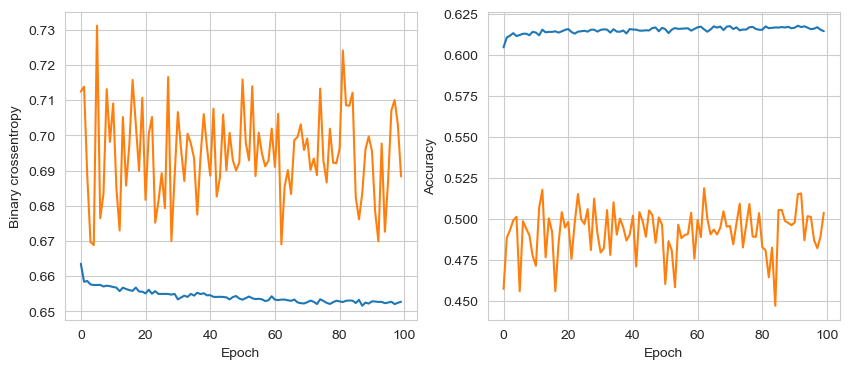

767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.6076 - loss: 0.6556
64 nodes, dropout 0.2, lr 0.005, batch size 64


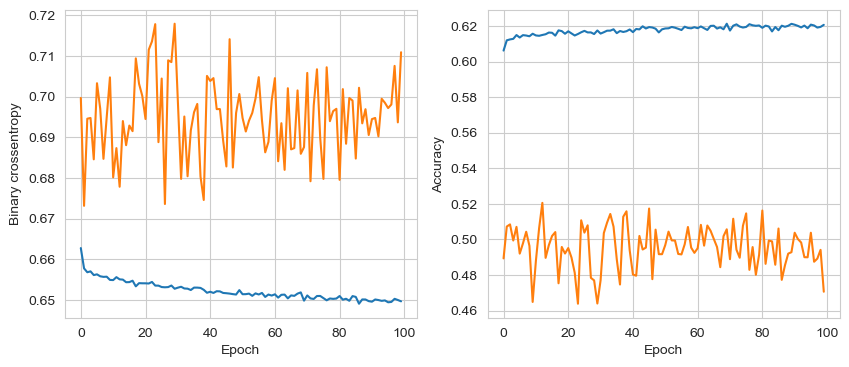

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6024 - loss: 0.6597
64 nodes, dropout 0.2, lr 0.005, batch size 128


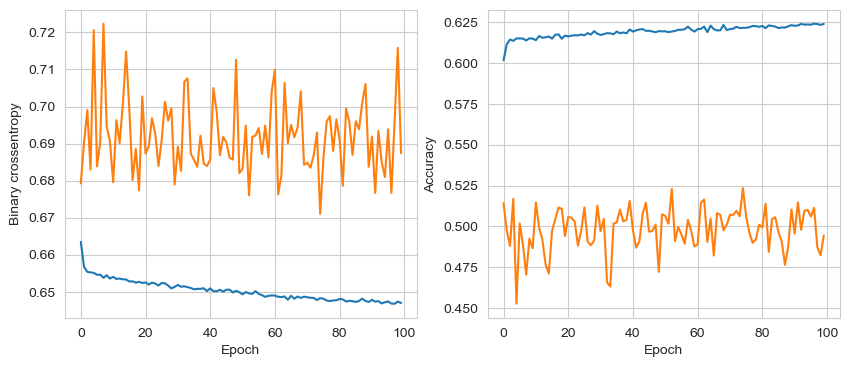

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6036 - loss: 0.6567
64 nodes, dropout 0.2, lr 0.001, batch size 32


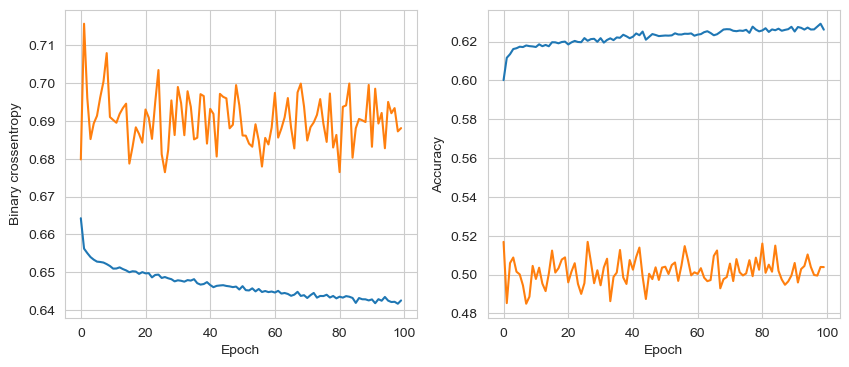

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6046 - loss: 0.6578
64 nodes, dropout 0.2, lr 0.001, batch size 64


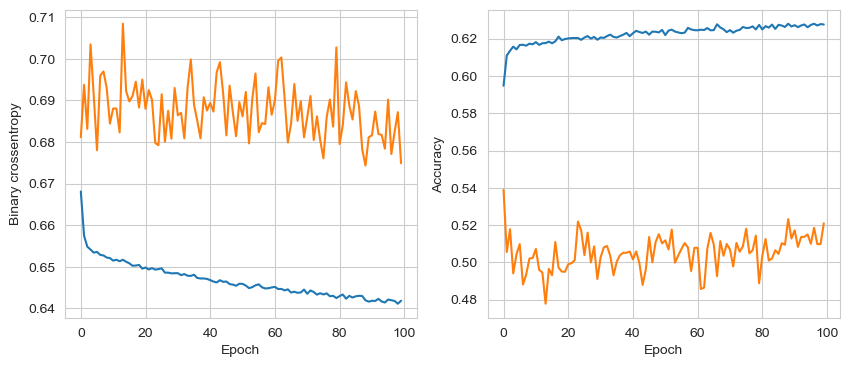

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.6034 - loss: 0.6583
64 nodes, dropout 0.2, lr 0.001, batch size 128


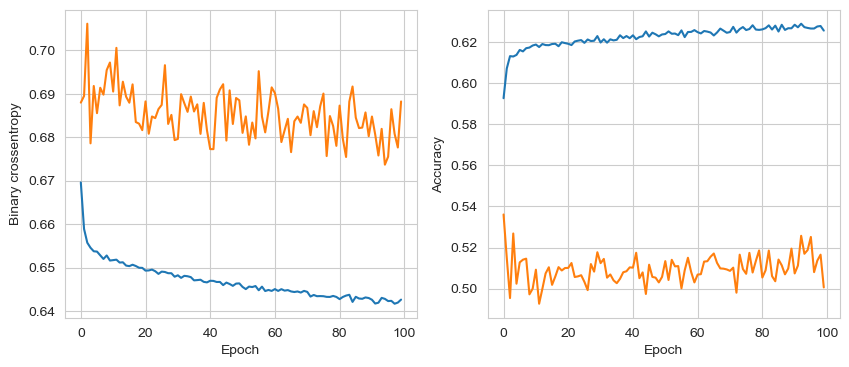

767/767 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.6031 - loss: 0.6574


In [65]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [66]:
# Make predictions
y_pred = least_loss_model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

765/765 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70     13340
           1       0.64      0.36      0.46     11127

    accuracy                           0.62     24467
   macro avg       0.62      0.60      0.58     24467
weighted avg       0.62      0.62      0.59     24467
